In [1]:
# 도미 데이터
bream_length = [
    25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
    31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
    35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0
  ]
bream_weight = [
    242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
    500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
    700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0
  ]

In [2]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

도미와 빙어의 데이터를 그래프를 만들어서 본다.

In [3]:
import matplotlib.pyplot as plt

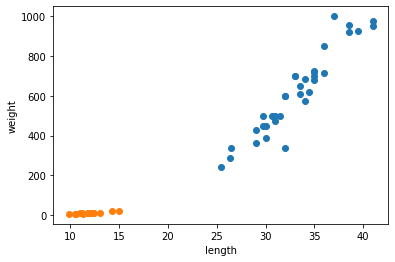

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

도미와 빙어의 데이터를 합친다

length와 weight에 합친후 fish_data 배열에 집어넣는다.

fish_target을 이용해서 도미는 1 빙어를 0으로 만들어준다. 도미인지 아닌지 판단하기 위해서 target을 이용하였다.

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [ [l, w] for l, w in zip(length, weight)]
fish_target=[1]*35 + [0]*14

fit과 score를 통해 평가 할 수 있다.

fit으로 모델을 만들고 학습하고 score를 통해 모델에 대한 평가를 할 수 있다.

아래 코드같은 경우에는 학습된 데이터에 대한 score를 냈기 때문에 1.0이 출력된다.

fit()
*   모델을 훈련할 때 사용하는 메서드
*   훈련에 사용할 특성과 정답 데이터를 매개변수로 전달한다.

score()

*   사이킷런 모델의 성능을 측정하는 메서드
*   매개변수로 특성과 정답 데이터를 전달
*   분류 모델인 경우, 예측 수행 후, 정답과 비교하여 올바르게 예측한 개수의 비율을 반환






In [6]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

predict 메서드를 이용해 데이터의 결과를 미리 예측해 볼 수 있다.

predict()

*    사이킷런 모델을 예측할 때 사용하는 메서드
*    특성 데이터 하나만 매개변수로 전달

In [7]:
kn.predict([[30,600]])

array([1])

In [8]:
kn.predict([[10,8]])

array([0])

훈련 세트와 테스트 세트를 만든다

하지만 아래 코드와 같이 만들면 34번까지의 data에는 도미가 들어가있고 35~49번 코드까지는 빙어가 들어가있기에 올바른 훈련데이터와 테스트데이터로 이루어지지 않는다.

In [9]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

train 과 test의 data를 편향적으로 만들었기 때문에 score는 0이 나오게 된다.

In [10]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

데이터가 편향되지 않게 섞기 위해 numpy를 이용한다

In [11]:
import numpy as np

fish_data와 fish_target을 numpy 배열에 넣는다.

In [12]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

데이터들의 인덱스를 붙이고 np.random.shuffle을 이용해 인덱스값을 섞는다.

In [13]:
index = np.arange(49)
np.random.shuffle(index)
print(index)

[46 18 10 17 28 32 20 21 25 47 15  0 35  1 40 23 39 14 41  3 37  4 29  8
 22 44  2 13 31 38 26 30  6 12 27  9  5 19 42 48 11  7 16 43 33 45 24 36
 34]


위에 사용했던 것 처럼 35까지 슬라이싱을 하여 train데이터와 test데이터를 나눈다.

In [14]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

train 데이터와 test 데이터가 적절히 섞여있는 모습을 볼 수 있다.

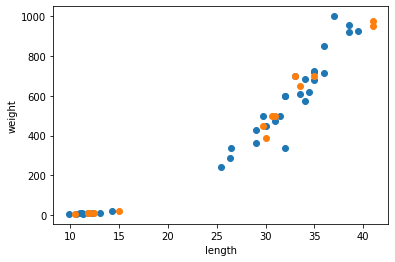

In [15]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [17]:
kn.predict(test_input)

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [18]:
test_target

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

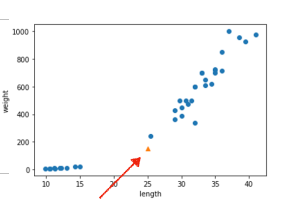

25,150은 우리의 눈으로 봤을 때는 도미쪽에 가까운데 컴퓨터는 빙어라고 가리키고있다.

predict를 이용해서 예측해보았을 때 0이 출력되는 것을 볼 수 있다.

In [19]:
print(kn.predict([[25,150]]))

[0]


이러한 일이 발생하는 이유는 x축과 y축의 scale이 다르기 때문에 scale을 맞추는 작업을 해준다.

knighbors를 이용하면 내가 지정한 값에서 가장 가까운 값 5개를 선정하는 것을 볼 수 있다

In [20]:
distances, indexes = kn.kneighbors([[25,150]])
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]
  [ 26.3 290. ]]]


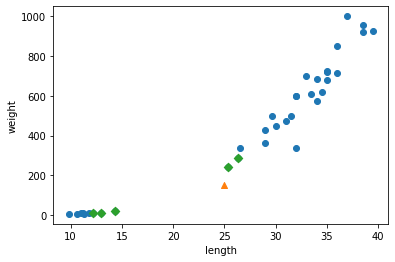

In [21]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

넘파이에서 제공하는 평균과 표준편차를 이용한다

mean 평균 std 표준편차

In [22]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)

[ 27.40285714 454.42857143] [  9.80482347 316.73504256]


train 데이터를 scale 크기에 맞게 사용할 수 있도록 처리 한다.

In [23]:
train_scaled = (train_input - mean) / std

In [24]:
mean = np.mean(test_input, axis=0)
std = np.std(test_input, axis=0)

test_scaled = (test_input - mean) / std

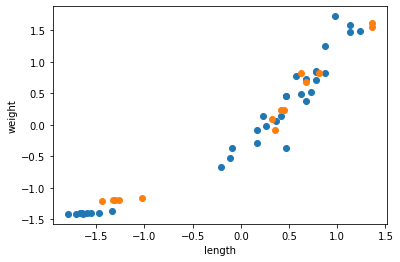

In [25]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(test_scaled[:,0],test_scaled[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
kn.predict([[25,150]])

array([0])

In [27]:
train_mean = np.mean(train_input, axis=0)
train_std = np.std(train_input, axis=0)

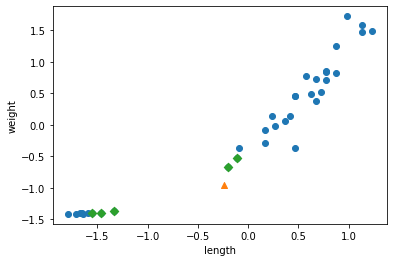

In [28]:
distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(((25-train_mean[0])/train_std[0]),((150-train_mean[1])/train_std[1]),marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

1. "도미 vs 빙어" 에서 스케일이 다른 특성 처리 결과 코드를 제출 하시오.



2. 사이킷런에 있는 다음의 kneighbors()를 numpy 모듈을 사용하여 함수로 작성하시오

사이킷런을 사용하지 않고 거리를 측정해서 가장 가까운 5개를 추출해서 찍어내기